In [27]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [28]:
df = pd.read_csv('kc_house_data.csv',encoding="ISO-8859-1",delimiter=',')
df_ = df
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [29]:
#shape of the dataframe
df.shape

(21613, 21)

In [30]:
#info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [31]:
#delete the id 
df.drop(["id"] ,inplace=True ,  axis= 1)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [32]:
#describe the dataframe
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [33]:
#search for null values in the dataframe
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

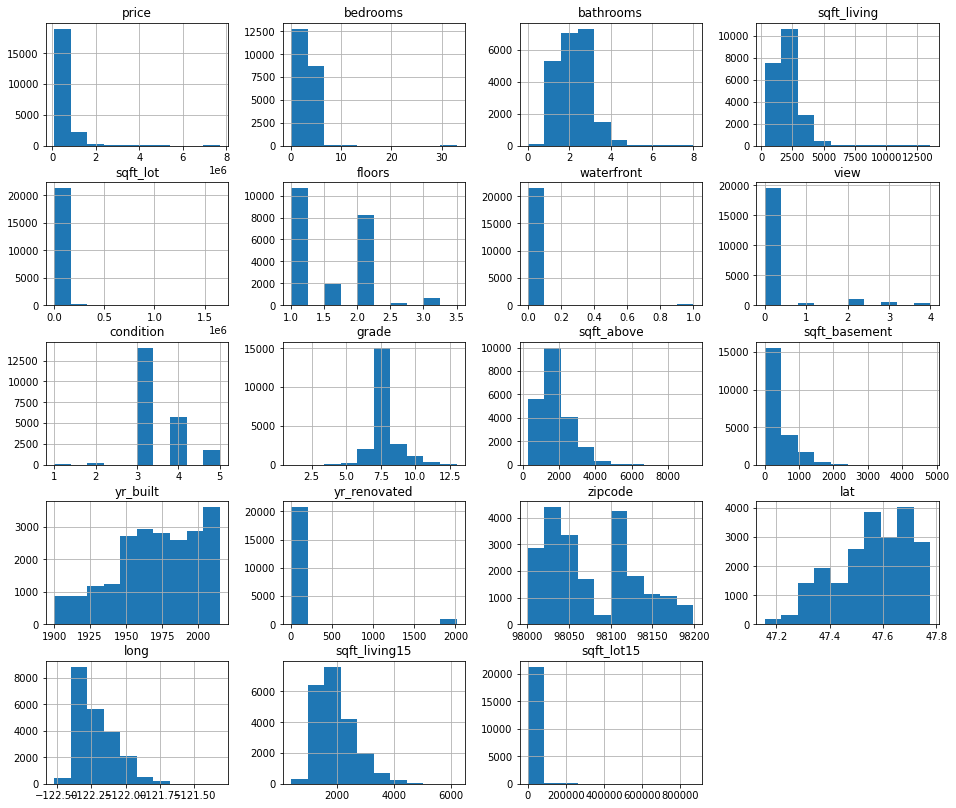

In [34]:
# plot the frequency table of all the features
df.hist(figsize=(16,14))
plt.show()


<AxesSubplot:xlabel='view', ylabel='price'>

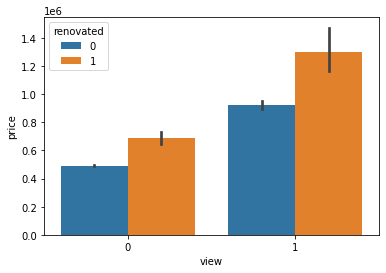

In [35]:
# since almost all the houses weren't renovated it'll be more interesting to see wether or not a house were renovated after 1995
df_["renovated"]  = df_['yr_renovated'].map(lambda x: 1 if x > 1995 else 0)
df_.drop(["yr_renovated"] ,inplace=True ,  axis= 1)

# same thing for the view , we'll be interested about if the house was viewed or not no matter how much 
df_["view"]  = df_['view'].map(lambda x: 1 if x > 0 else 0)

#plot the price by the view 
sns.barplot(x="view",y="price",hue = "renovated" ,data=df_)


we can say that the price is affected by the renovation and views

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

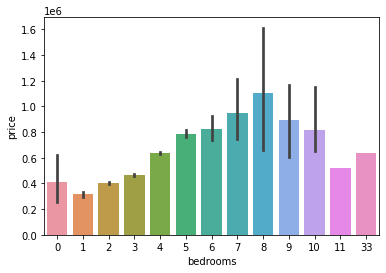

In [36]:
#plot the price by number of bedrooms
sns.barplot(x="bedrooms",y="price" ,data=df_)

<AxesSubplot:xlabel='floors', ylabel='price'>

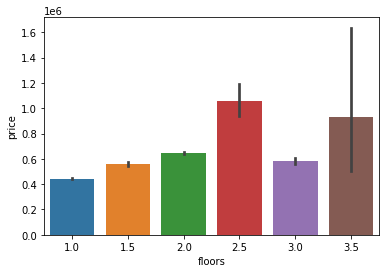

In [37]:
#plot the price by number of floors
sns.barplot(x="floors",y="price" ,data=df_)

Living area

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

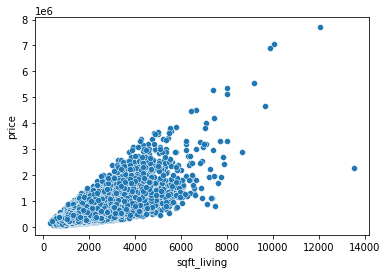

In [38]:
sns.scatterplot(x="sqft_living",y="price" ,data=df)

we can see that the houses with bigger area are more expensive 

In [39]:

#describe sqft_living 
df_.sqft_living.describe()  
# df_.sqft_lot.describe() 

count    21613.000000
mean      2079.899736
std        918.440897
min        290.000000
25%       1427.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

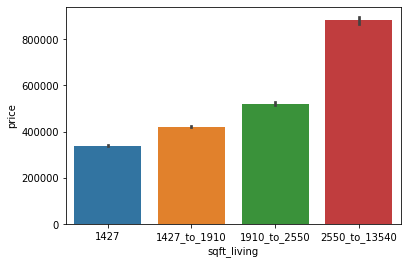

In [40]:
#another way to see the relation between the price and living area

#limits of intervales are extracted from the previous result 
sqft_living_bins = [0, 1427, 1910, 2550, 13541]
sqft_living_labels = ['1427', '1427_to_1910', '1910_to_2550', '2550_to_13540']

df_['sqft_living'] = pd.cut(df_['sqft_living'], bins = sqft_living_bins, labels = sqft_living_labels)
sns.barplot(x="sqft_living",y="price" ,data=df_)

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

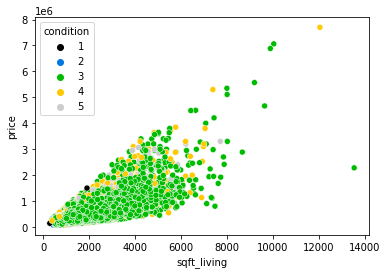

In [41]:
#plotting the price by linig area with condition as hue 
sns.scatterplot(x="sqft_living",y="price",hue = 'condition'  ,data=df  ,palette='nipy_spectral')


<AxesSubplot:xlabel='sqft_living', ylabel='price'>

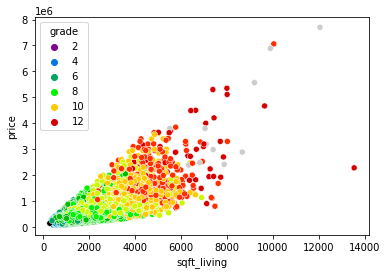

In [42]:
#plotting the price by linig area with grade as hue 
sns.scatterplot(x="sqft_living",y="price",hue = 'grade'  ,data=df  ,palette='nipy_spectral')

we notice that hoses with higher grade and bigger area are more expensive 

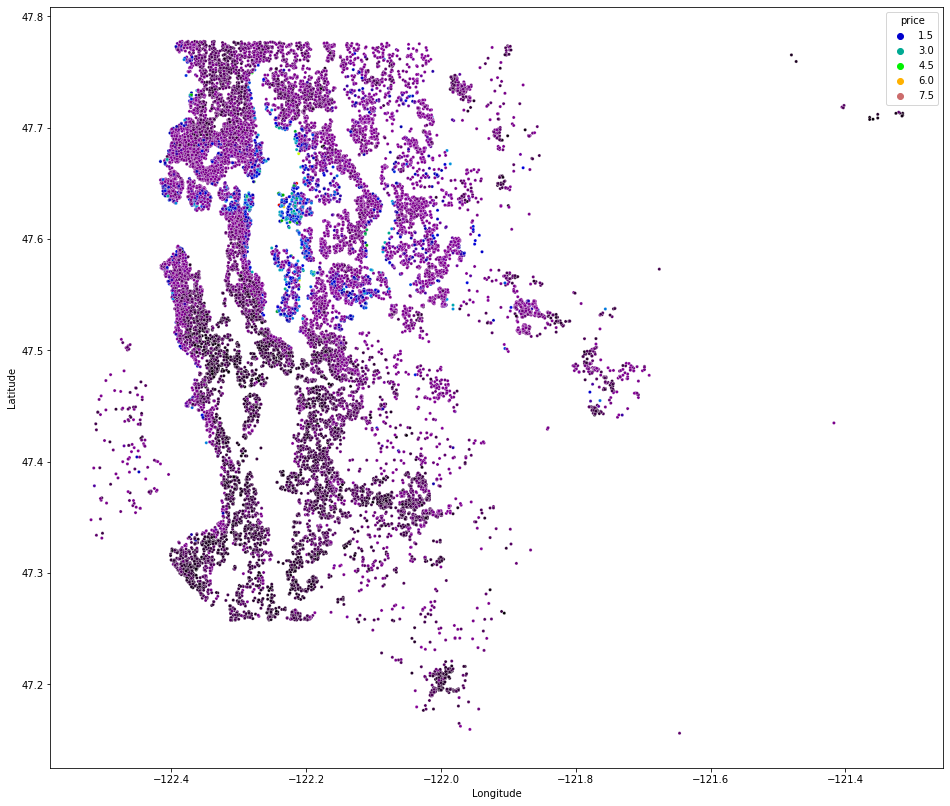

In [43]:


plt.figure(figsize = (16,14))
ax = sns.scatterplot(x = df['long'], y = df['lat'], hue = df['price'],palette = 'nipy_spectral',s=10, data = df)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


the previous graph shows us the price in function of the location 

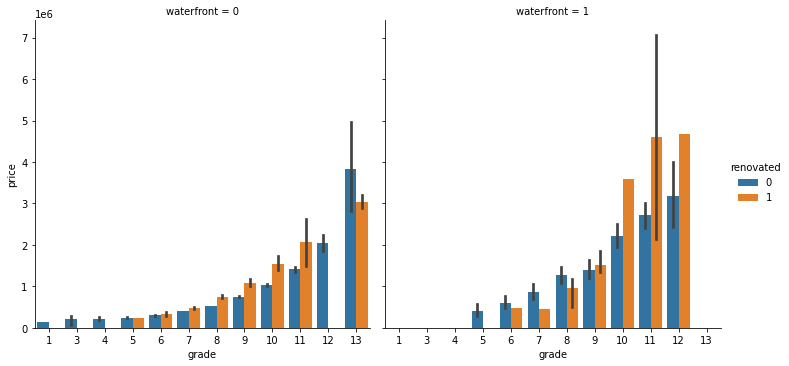

In [44]:
sns.catplot(x="grade",y="price",hue="renovated",col="waterfront",kind="bar",data=df_)

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

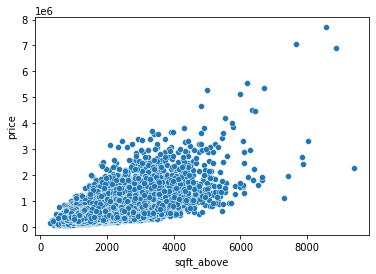

In [45]:
sns.scatterplot(x=df.sqft_above,y=df.price)


<AxesSubplot:xlabel='sqft_lot', ylabel='price'>

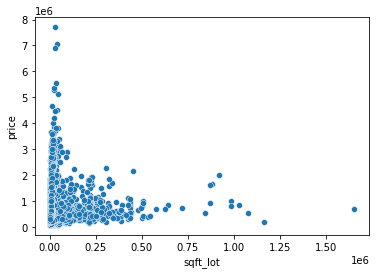

In [46]:
sns.scatterplot(x="sqft_lot",y="price", data=df)


In [48]:
# remove unused data

df_.drop(["id" , "sqft_lot" , "yr_built" ,"zipcode" , "sqft_living15" , "sqft_lot15","lat","long"] ,inplace=True ,  axis= 1)

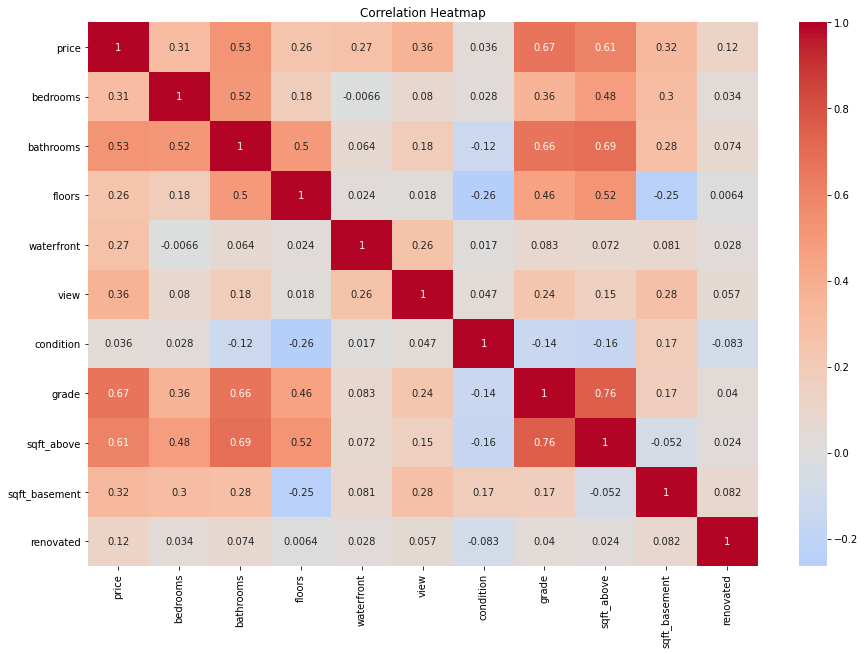

In [49]:
#correlation heatmap
plt.figure(figsize = (15,10))
sns.heatmap(df_.corr(), center = 0, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# linear regression

In [ ]:
#split data
x = df[["sqft_living"]] 
y = df[["price"]] 

#we'll take 20% of the data for testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=20, random_state = 40)
 


In [ ]:
model=LinearRegression() 

In [ ]:
model.fit(x_train,y_train)  
predicted=model.predict(x_test)

In [ ]:
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 36119587725.356735
R squared 0.6728475506266292


the of R-squared for the regression model is 67%  wich means that the model explains 67% of the variability 

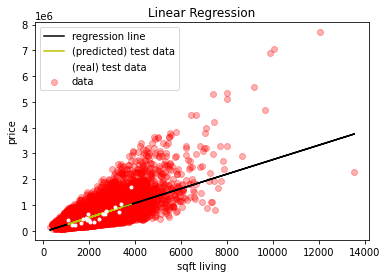

In [ ]:
plt.scatter(x,y,color="r" , alpha=0.3 , label = "data")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqft living")
plt.plot(x,model.predict(x),color="k" , label = "regression line")
plt.plot(x_test , model.predict(x_test),color="y" , label ="(predicted) test data")
plt.plot(x_test , y_test,'.' ,color="white",label = "(real) test data")
plt.legend()
plt.show()

# multi-linear regression

In [ ]:
x = df[["sqft_living" ,"grade"]]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=20,random_state =40)

In [ ]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [ ]:
predicted=model.predict(x_test)

In [ ]:
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 40245846877.44353
R squared 0.6354740402028982


the of R-squared for the regression model is 63% 

# polynomial regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures 

x = df[["sqft_living" ]]
y = df[["price"]]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=20,random_state = 40)
lg = LinearRegression() 
poly = PolynomialFeatures(degree = 3) 
x_ = poly.fit_transform(x)
x_train_=poly.fit_transform(x_train)
x_test_=poly.fit_transform(x_test)
lg.fit(x_train_, y_train)

lg.predict(x_test_)
print("MSE", mean_squared_error(y_test,lg.predict(x_test_)))
print("R squared", metrics.r2_score(y_test,lg.predict(x_test_)))

MSE 32527694914.64579
R squared 0.7053810485127565


the of R-squared for the regression model is 70%  wich means that the model explains 70% of the variability 

the results with a polynomial regression are better then the multi-linear regression

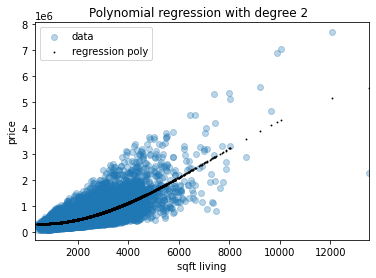

In [ ]:
plt.figure()
plt.scatter(x,y, alpha= 0.3, label = "data")
plt.ylabel("price")
plt.xlabel("sqft living")
plt.scatter(x,lg.predict(x_),color="k" , marker = "." ,s = 3,label = "regression poly")
plt.xlim(x.sqft_living.min()  ,x.sqft_living.max() )

plt.title("Polynomial regression with degree 2  ")
plt.legend()
plt.show()